<a href="https://colab.research.google.com/github/naga-dheeraj-p/Machine_LEARNING_projects/blob/main/EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data=pd.read_csv('/content/sample_data/quant_data.csv')
data.head()

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131,none,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726,none,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724,buy,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859,none,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647,none,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44


In [80]:
print(data['signal'].unique())

['none' 'buy' 'sell']


In [81]:
#Converting to float datatype
data['Fear_and_Greed_Index'] = data['Fear_and_Greed_Index'].astype(float)

signal_mapping = {'buy': 1, 'sell': -1, 'none': 0} # Mapping categorical variable into numerical
data['signal'] = data['signal'].map(signal_mapping)

data.head()

,datetime,open,high,low,close,volume,reserve,funding_rates,mvrv,nrpl,nupl,stock_to_flow_reversion,sth_sopr,signal,RSI,9_ema,21_ema,50_ema,200_ema,Fear_and_Greed_Index
0,2020-07-16,9190.80,9216.02,9005.00,9130.11,8765.698589,2.889262e+06,0.009332,1.563972,-3.694023e+06,0.360602,0.421011,0.997131,0,47.108800,9214.535081,9196.119258,9524.945856,9671.528810,43.0
1,2020-07-17,9130.93,9182.99,9054.99,9154.29,6423.747162,2.889943e+06,0.007262,1.568555,3.367513e+05,0.362471,0.366354,0.999726,0,48.843088,9202.486065,9206.292278,9560.413230,9718.271795,41.0
2,2020-07-18,9154.29,9210.00,9122.65,9175.85,4121.626974,2.890642e+06,0.004125,1.572507,7.637219e+06,0.364073,0.404649,1.000724,1,50.404638,9197.158852,9216.465298,9595.880603,9765.014781,44.0
3,2020-07-19,9175.83,9245.03,9105.37,9212.87,3520.072476,2.892067e+06,0.007809,1.579355,2.053120e+07,0.366830,0.409607,1.000859,0,53.054470,9200.301081,9226.638318,9631.347977,9811.757766,41.0
4,2020-07-20,9214.01,9223.51,9131.00,9161.05,5815.330842,2.891858e+06,0.010244,1.568483,7.103351e+06,0.362441,0.437860,1.000647,0,49.099864,9192.450865,9236.811338,9666.815351,9858.500751,44.0


In [67]:
data.describe()
data.isnull().sum()

datetime                   0
open                       0
high                       0
low                        0
close                      0
volume                     0
reserve                    0
funding_rates              0
mvrv                       0
nrpl                       0
nupl                       0
stock_to_flow_reversion    0
sth_sopr                   0
signal                     0
RSI                        0
9_ema                      0
21_ema                     0
50_ema                     0
200_ema                    0
Fear_and_Greed_Index       0
dtype: int64

In [68]:
data['signal'].value_counts()

signal
 0    771
-1     86
 1     78
Name: count, dtype: int64

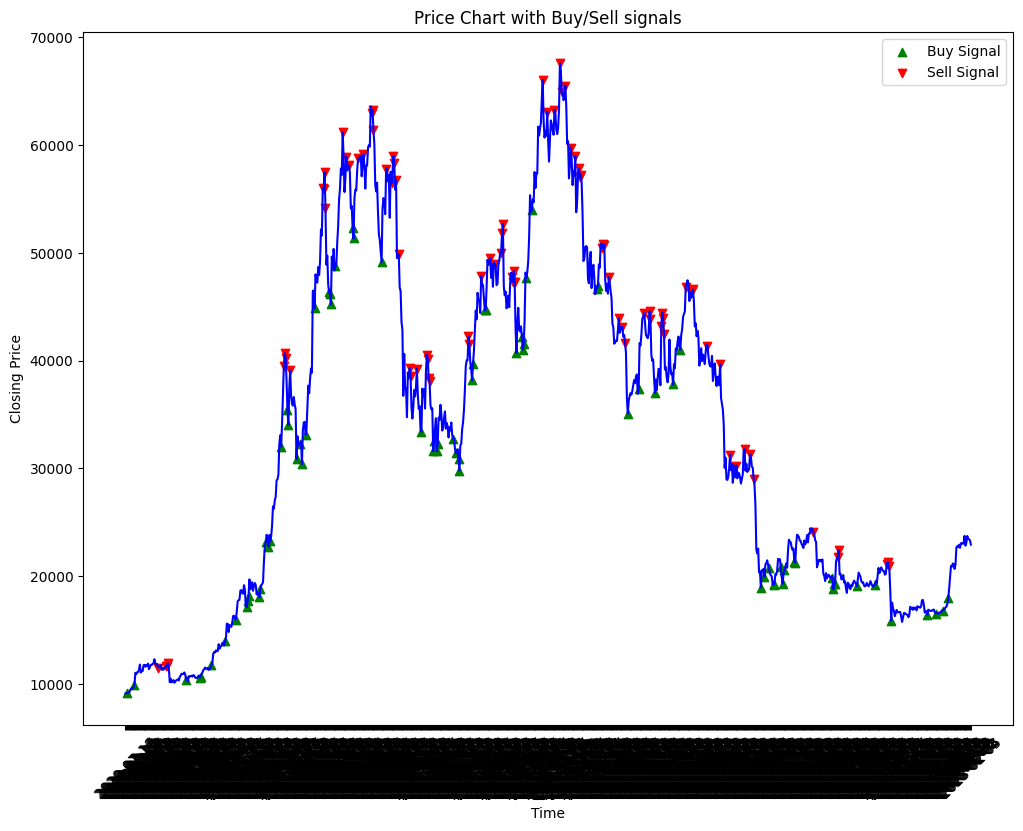

In [69]:
plt.figure(figsize=(12, 9))
plt.plot(data['datetime'], data['close'], color='blue')
plt.title('Price Chart with Buy/Sell signals')
plt.xlabel('Time')
plt.ylabel('Closing Price')

buy_signals = data[data['signal'] == 1]
sell_signals = data[data['signal'] == -1]
plt.scatter(buy_signals['datetime'], buy_signals['close'], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals['datetime'], sell_signals['close'], color='red', marker='v', label='Sell Signal')

plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

Plotting EMAs along with buy/sell signals to identify potential trading opportunities.

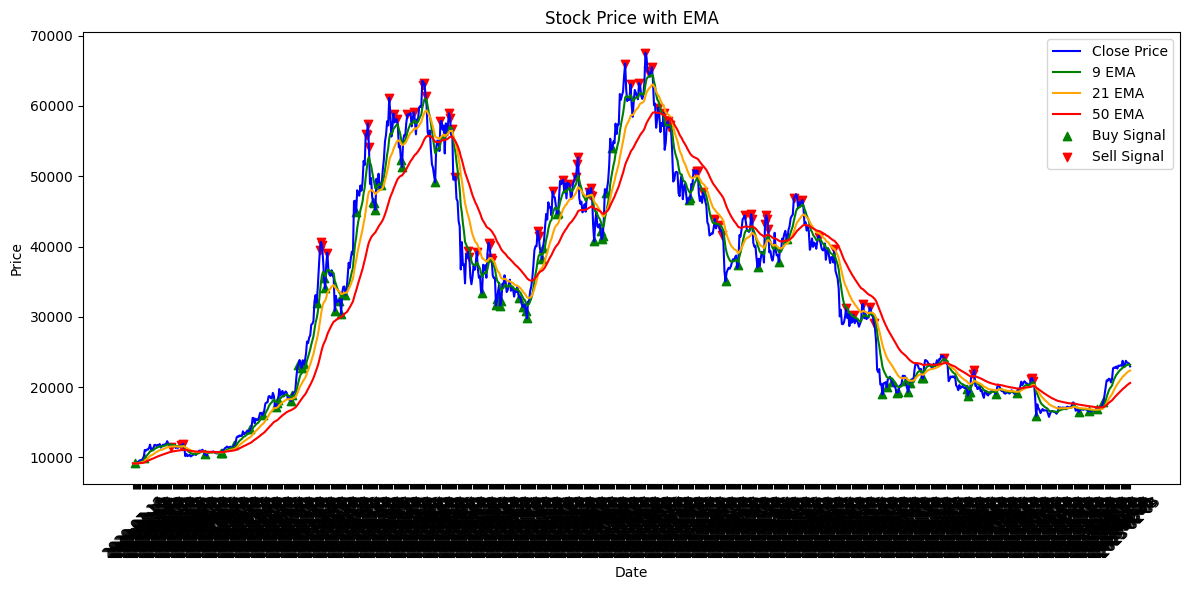

In [70]:
data['9_ema'] = data['close'].ewm(span=9, adjust=False).mean()
data['21_ema'] = data['close'].ewm(span=21, adjust=False).mean()
data['50_ema'] = data['close'].ewm(span=50, adjust=False).mean()

# Plot the stock price and EMAs
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['close'], label='Close Price', color='blue')
plt.plot(data['datetime'], data['9_ema'], label='9 EMA', color='green')
plt.plot(data['datetime'], data['21_ema'], label='21 EMA', color='orange')
plt.plot(data['datetime'], data['50_ema'], label='50 EMA', color='red')

buy_signals = data[data['signal'] == 1]
sell_signals = data[data['signal'] == -1]
plt.scatter(buy_signals['datetime'], buy_signals['close'], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals['datetime'], sell_signals['close'], color='red', marker='v', label='Sell Signal')

plt.title('Stock Price with EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotating x-axis labels
plt.tight_layout()
plt.show()

# Data Pre-Processing

CORRELATION MATRIX :generated the correlation matrix.

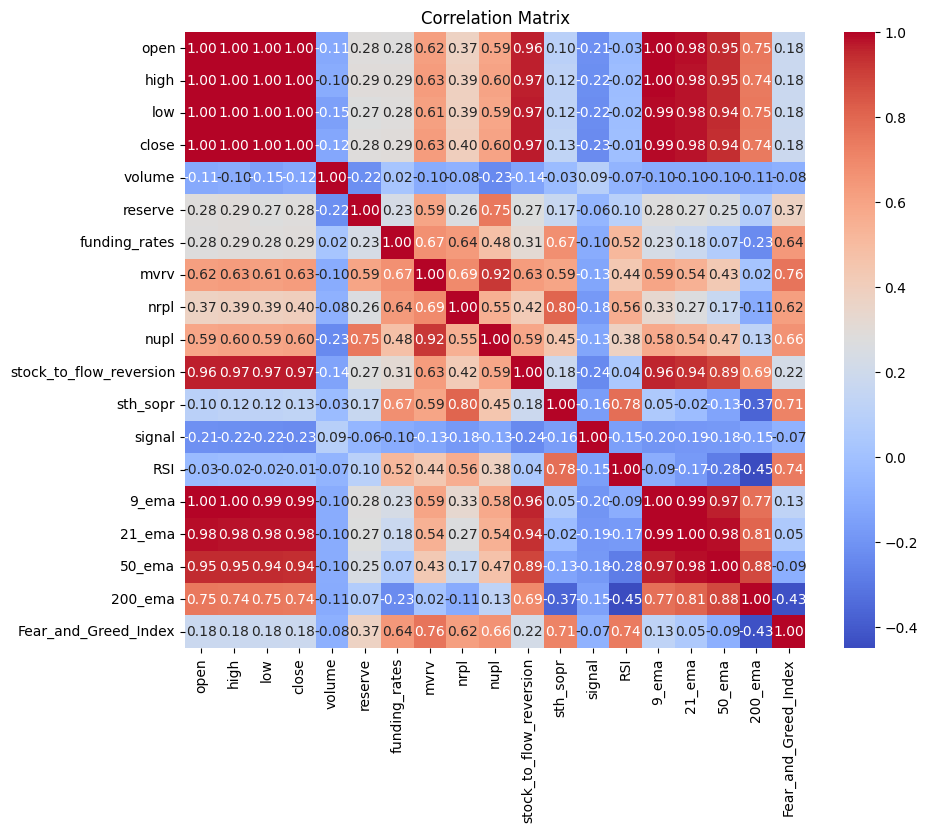

In [71]:
data = data.drop('datetime', axis=1)
data = pd.DataFrame(data.iloc[:,:])
correlation_matrix = data.corr()
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Handling Outliers

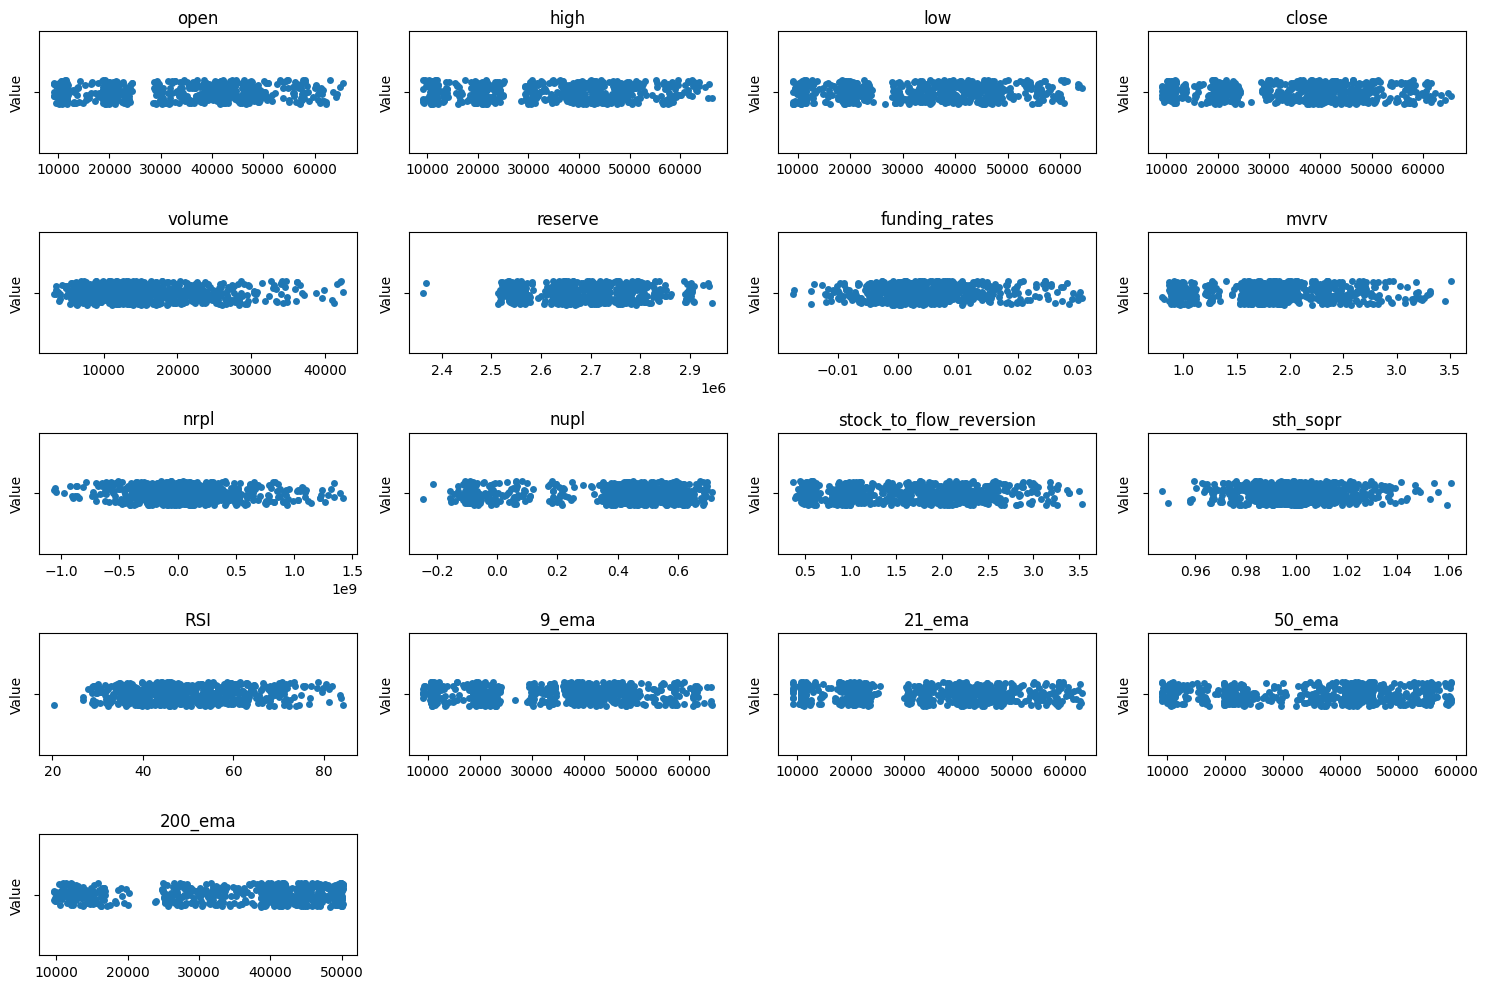

In [75]:
columns_to_handle_outliers = ['open', 'high', 'low', 'close', 'volume', 'reserve', 'funding_rates',
                              'mvrv', 'nrpl', 'nupl', 'stock_to_flow_reversion', 'sth_sopr', 'RSI', '9_ema', '21_ema', '50_ema', '200_ema']

#OUTLIER VISUALIZATION
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_handle_outliers, 1):
    plt.subplot(5, 4, i)
    sns.stripplot(x=data[column])
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

for i in columns_to_handle_outliers:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[i] < lower_bound) | (data[i] > upper_bound)
    data.loc[outliers, i] = None

processed_data= data.dropna()

# Developing a ML Model

K-Nearest Neighbors (KNN)

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = processed_data.drop(columns=['signal'])
y = processed_data['signal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2),'%')


Accuracy: 83.65 %


STACKING XGB,LGBM AND CATBOOSTER

In [ ]:
pip install catboost

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

x = data.drop(columns=['signal'])
y = data['signal']



xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()
catboost_model = CatBoostClassifier()


meta_learner = LogisticRegression() #Base Model


stacking_classifier = StackingClassifier(estimators=[('xgb', xgb_model), ('lgbm', lgbm_model), ('catboost', catboost_model)],final_estimator=meta_learner,cv=5)

stacking_classifier.fit(x_train, y_train)

# Predicting target labels for test data
y_pred_stacking = stacking_classifier.predict(x_test)

# Calculating accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy_stacking*100)


Streaming output truncated to the last 5000 lines.
5:	learn: 0.8341192	total: 66.2ms	remaining: 11s
6:	learn: 0.8033537	total: 76ms	remaining: 10.8s
7:	learn: 0.7754793	total: 89.1ms	remaining: 11s
8:	learn: 0.7531820	total: 98.9ms	remaining: 10.9s
9:	learn: 0.7302235	total: 109ms	remaining: 10.7s
10:	learn: 0.7084487	total: 118ms	remaining: 10.6s
11:	learn: 0.6915766	total: 128ms	remaining: 10.5s
12:	learn: 0.6771386	total: 137ms	remaining: 10.4s
13:	learn: 0.6619977	total: 147ms	remaining: 10.3s
14:	learn: 0.6496141	total: 156ms	remaining: 10.2s
15:	learn: 0.6370813	total: 165ms	remaining: 10.2s
16:	learn: 0.6265816	total: 175ms	remaining: 10.1s
17:	learn: 0.6144161	total: 185ms	remaining: 10.1s
18:	learn: 0.6041007	total: 195ms	remaining: 10.1s
19:	learn: 0.5951320	total: 211ms	remaining: 10.3s
20:	learn: 0.5856627	total: 221ms	remaining: 10.3s
21:	learn: 0.5784367	total: 231ms	remaining: 10.3s
22:	learn: 0.5715151	total: 241ms	remaining: 10.3s
23:	learn: 0.5627819	total: 251ms	rema